In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [2]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\Documents\Data Science\feynn

07/02/2024  02:41 PM    <DIR>          .
07/02/2024  02:41 PM    <DIR>          ..
07/02/2024  02:36 PM    <DIR>          .ipynb_checkpoints
06/09/2024  08:17 PM            49,433 4-wheeler-EV-carwale.csv
12/17/2020  03:39 PM               334 Budget.csv
06/19/2024  11:50 AM           581,256 Customer Review Analysis (Ev).pdf
06/19/2024  11:16 AM           730,441 EV customer reviews.ipynb
06/14/2024  02:12 PM           879,936 MacD_Market_Segmentation_case_study.ipynb
05/23/2024  01:51 PM         7,784,656 Market_Segmentation_Analysis.pdf
05/23/2024  03:55 PM            96,988 mcdonalds.csv
07/02/2024  02:41 PM               617 Personal_Financing.ipynb
12/17/2020  03:39 PM            50,600 personal_transactions.csv
07/02/2024  02:37 PM         1,276,294 sample case study of vendoors.ipynb
06/19/2024  11:49 AM           601,969 Sayali Hatwar - Cus

# Data Preparation

In [111]:
per_tran = pd.read_csv('Personal_transactions.csv')
per_tran.head()

Date          Description   Amount Transaction Type  \
0  01/01/2018               Amazon    11.11            debit   
1  01/02/2018     Mortgage Payment  1247.44            debit   
2  01/02/2018      Thai Restaurant    24.22            debit   
3  01/03/2018  Credit Card Payment  2298.09           credit   
4  01/04/2018              Netflix    11.76            debit   

              Category   Account Name  
0             Shopping  Platinum Card  
1      Mortgage & Rent       Checking  
2          Restaurants    Silver Card  
3  Credit Card Payment  Platinum Card  
4        Movies & DVDs  Platinum Card

In [112]:
budget = pd.read_csv('Budget.csv')
budget.head()

Category  Budget
0          Alcohol & Bars      50
1          Auto Insurance      75
2            Coffee Shops      15
3  Electronics & Software       0
4           Entertainment      25

In [113]:
per_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [114]:
per_tran.isnull().sum()

Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account Name        0
dtype: int64

In [115]:
per_tran.count()

Date                806
Description         806
Amount              806
Transaction Type    806
Category            806
Account Name        806
dtype: int64

### Value Counts

In [116]:
per_tran['Description'].value_counts()

Credit Card Payment    143
Grocery Store          103
Amazon                  59
Biweekly Paycheck       46
Hardware Store          34
                      ... 
Irish Pub                1
Tiny Deli                1
Chevron                  1
Japanese Restaurant      1
Sheetz                   1
Name: Description, Length: 65, dtype: int64

In [117]:
per_tran['Transaction Type'].value_counts()

debit     688
credit    118
Name: Transaction Type, dtype: int64

In [118]:
per_tran['Category'].value_counts()

Credit Card Payment       143
Groceries                 105
Restaurants                81
Utilities                  63
Shopping                   60
Gas & Fuel                 52
Paycheck                   46
Home Improvement           36
Coffee Shops               31
Alcohol & Bars             25
Music                      21
Mobile Phone               21
Mortgage & Rent            21
Internet                   21
Movies & DVDs              18
Auto Insurance             18
Fast Food                  16
Haircut                    13
Television                  8
Electronics & Software      4
Food & Dining               2
Entertainment               1
Name: Category, dtype: int64

In [119]:
per_tran['Account Name'].value_counts()

Platinum Card    366
Checking         264
Silver Card      176
Name: Account Name, dtype: int64

# Exploratory Data Analysis (EDA)

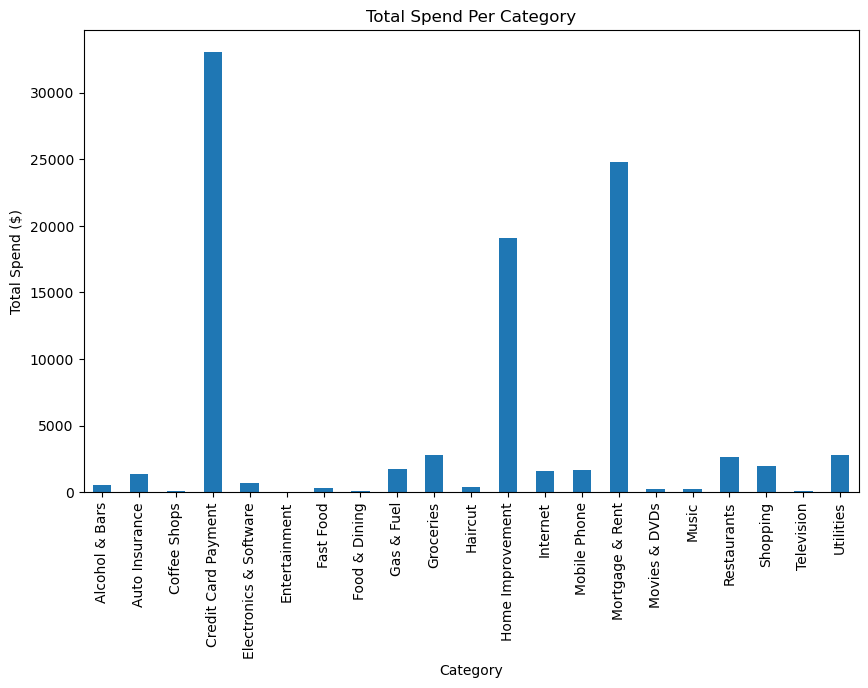

In [120]:
# Convert 'Date' to datetime
per_tran['Date'] = pd.to_datetime(per_tran['Date'])

# Total spend per category
category_spend = per_tran[per_tran['Transaction Type'] == 'debit'].groupby('Category')['Amount'].sum()

plt.figure(figsize=(10, 6))
category_spend.plot(kind='bar')
plt.title('Total Spend Per Category')
plt.xlabel('Category')
plt.ylabel('Total Spend ($)')
plt.show()


## Debits Analysis

In [121]:
debits = per_tran[per_tran['Transaction Type'] == 'debit']

In [122]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def count_sum(per_tran, column: str, plot = "Pie"):
    # Group by the specified column and aggregate transaction counts and amounts
    by_column = per_tran\
                .groupby(column)\
                .agg({"Transaction Type": "count", "Amount": "sum"})\
                .rename(columns={"Transaction Type": "Total"})\
                .reset_index()
    
    # Rename columns for clarity
    by_column.columns = [column, "Total", "Sum"]
    
    labels = by_column[column]
    fig = None
    
    if plot == 'Pie':
        fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                            subplot_titles=['Sum', 'Total'])
        fig.add_trace(
            go.Pie(
                labels=labels,
                values=by_column["Sum"],
                name="Sum"),1,1)
        fig.add_trace(
            go.Pie(
                labels=labels,
                values=by_column["Total"],
                name="Total",
            ), 1, 2)
    elif plot == 'Scatter':
        fig = make_subplots(1, 2,
                            subplot_titles=['Sum', 'Total'])
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Sum"],
                name="Sum"
            ), 1, 1)
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Total"],
                name="Total"
            ), 1, 2)

    fig.update_layout(title_text=f"{column} Analysis")
    fig.show()
    
    return by_column

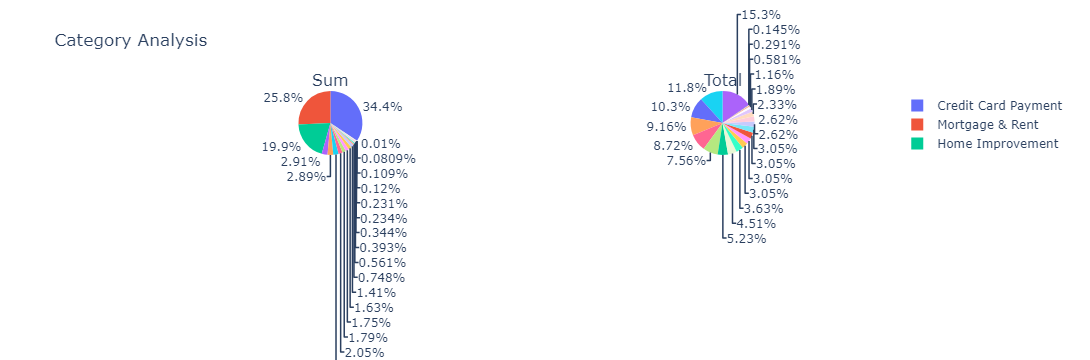

Category  Total       Sum
0           Alcohol & Bars     25    539.13
1           Auto Insurance     18   1350.00
2             Coffee Shops     31    115.54
3      Credit Card Payment     71  33041.36
4   Electronics & Software      4    719.00
5            Entertainment      1      9.62
6                Fast Food     16    330.63
7            Food & Dining      2     77.75
8               Gas & Fuel     52   1715.17
9                Groceries    105   2795.21
10                 Haircut     13    378.00
11        Home Improvement     36  19092.87
12                Internet     21   1570.88
13            Mobile Phone     21   1680.40
14         Mortgage & Rent     21  24754.50
15           Movies & DVDs     18    222.19
16                   Music     21    224.49
17             Restaurants     81   2613.02
18                Shopping     60   1973.24
19              Television      8    104.78
20               Utilities     63   2776.00

In [123]:
# Test the function
count_sum(debits, 'Category', plot='Pie')

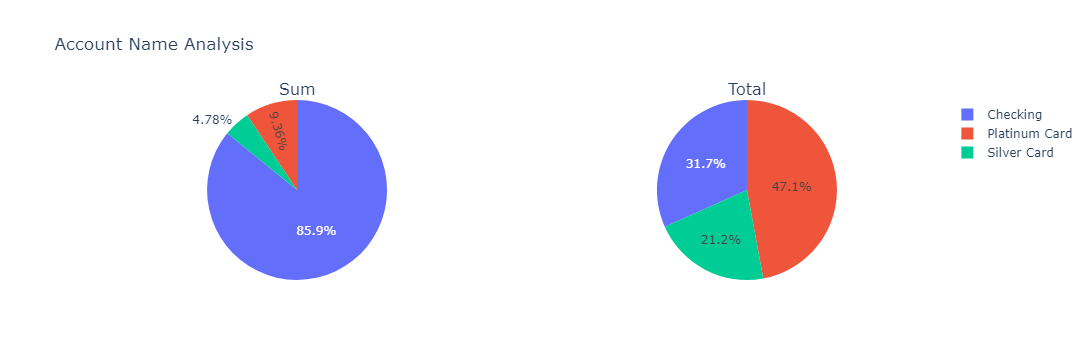

Account Name  Total       Sum
0       Checking    218  82498.14
1  Platinum Card    324   8996.31
2    Silver Card    146   4589.33

In [124]:
cards = count_sum(debits, "Account Name")
cards

## Credit Analysis

In [125]:
credits = per_tran[per_tran['Transaction Type']=='credit']

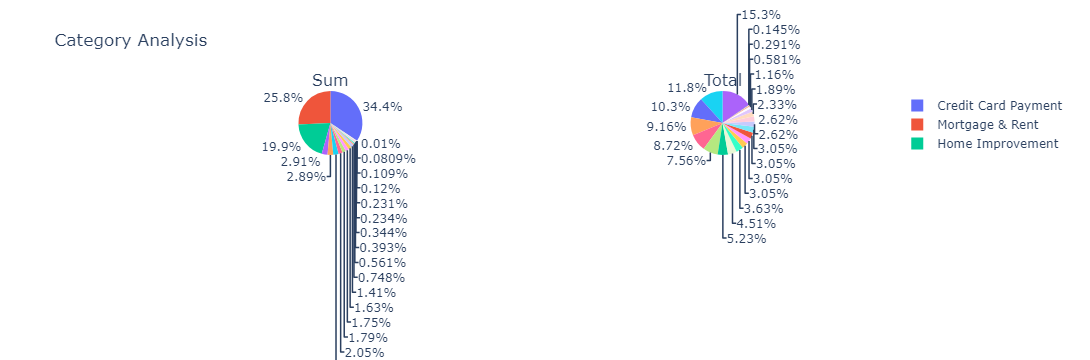

Category  Total       Sum
0           Alcohol & Bars     25    539.13
1           Auto Insurance     18   1350.00
2             Coffee Shops     31    115.54
3      Credit Card Payment     71  33041.36
4   Electronics & Software      4    719.00
5            Entertainment      1      9.62
6                Fast Food     16    330.63
7            Food & Dining      2     77.75
8               Gas & Fuel     52   1715.17
9                Groceries    105   2795.21
10                 Haircut     13    378.00
11        Home Improvement     36  19092.87
12                Internet     21   1570.88
13            Mobile Phone     21   1680.40
14         Mortgage & Rent     21  24754.50
15           Movies & DVDs     18    222.19
16                   Music     21    224.49
17             Restaurants     81   2613.02
18                Shopping     60   1973.24
19              Television      8    104.78
20               Utilities     63   2776.00

In [126]:
count_sum(debits, "Category")

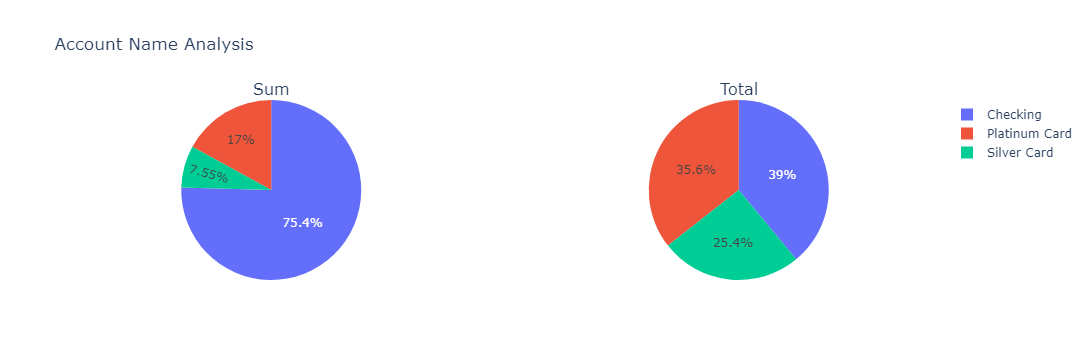

Account Name  Total       Sum
0       Checking     46  93750.00
1  Platinum Card     42  21139.93
2    Silver Card     30   9379.83

In [127]:
count_sum(credits, "Account Name")

## Apriori Algorithm Implementation
- Application of Apriori algorithm to find frequent item sets and generate association rules from transactions.

In [135]:
from apyori import apriori

# Prepare the data for the Apriori algorithm
transactions = per_tran[per_tran['Transaction Type'] == 'debit'].groupby('Date')['Category'].apply(list).tolist()

# Apply Apriori algorithm
rules = apriori(per_tran, min_support=0.1, min_confidence=0.5, min_lift=1.0, min_length=2)
results = list(rules)

# Print the results
for result in results:
    print(result)


RelationRecord(items=frozenset({'a'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'a'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'c'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'c'}), confidence=0.5, lift=1.0)])
RelationRecord(items=frozenset({'e'}), support=0.8333333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'e'}), confidence=0.8333333333333334, lift=1.0)])
RelationRecord(items=frozenset({'n'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'n'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'o'}), support=0.8333333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'o'}), confidence=0.8333333333333334, lift=1.0)])
RelationRecord(items=frozenset({'r'

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



RelationRecord(items=frozenset({'c', 'e', 'm', ' ', 'u'}), support=0.16666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({' '}), items_add=frozenset({'e', 'u', 'c', 'm'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'m'}), items_add=frozenset({'e', 'u', 'c', ' '}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'u'}), items_add=frozenset({'e', 'c', ' ', 'm'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'c', ' '}), items_add=frozenset({'u', 'e', 'm'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'e', ' '}), items_add=frozenset({'u', 'c', 'm'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({' ', 'm'}), items_add=frozenset({'e', 'u', 'c'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'u', ' '}), items_add=frozenset({'e', 'c', 'm'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'c', 'm'}), items_add=frozenset({'u', 'e'

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



RelationRecord(items=frozenset({'p', 'r', 'n', 's', 'y', 'a'}), support=0.16666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'p'}), items_add=frozenset({'a', 'r', 's', 'y', 'n'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'s'}), items_add=frozenset({'p', 'r', 'n', 'y', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'y'}), items_add=frozenset({'p', 'r', 'n', 's', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'a', 'n'}), items_add=frozenset({'p', 's', 'r', 'y'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'a', 'p'}), items_add=frozenset({'n', 's', 'r', 'y'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'a', 'r'}), items_add=frozenset({'p', 's', 'y', 'n'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'a', 's'}), items_add=frozenset({'p', 'y', 'r', 'n'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



RelationRecord(items=frozenset({'c', 'T', 'r', 'e', 't', 'y', ' '}), support=0.16666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({' '}), items_add=frozenset({'c', 'T', 'r', 'e', 't', 'y'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'T'}), items_add=frozenset({'c', 'r', 'e', 't', 'y', ' '}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'y'}), items_add=frozenset({'c', 'T', 'r', 'e', 't', ' '}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'T', ' '}), items_add=frozenset({'c', 'r', 'e', 't', 'y'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'c', ' '}), items_add=frozenset({'T', 'r', 'e', 't', 'y'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'e', ' '}), items_add=frozenset({'c', 'T', 'r', 't', 'y'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({' ', 'r'}), items_add=frozenset({'c', 'T', 'e', 't', 'y'}), confidence=1.0, lift=6.0), 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



RelationRecord(items=frozenset({'p', 'c', 'T', 'i', 'e', 'y', 'a'}), support=0.16666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'T'}), items_add=frozenset({'p', 'c', 'i', 'e', 'y', 'a'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'i'}), items_add=frozenset({'p', 'c', 'T', 'e', 'y', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'p'}), items_add=frozenset({'c', 'T', 'i', 'e', 'y', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'y'}), items_add=frozenset({'p', 'c', 'T', 'i', 'e', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'a', 'T'}), items_add=frozenset({'p', 'c', 'i', 'e', 'y'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'c', 'T'}), items_add=frozenset({'p', 'i', 'e', 'y', 'a'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'e', 'T'}), items_add=frozenset({'p', 'c', 'i', 'y', 'a'}), confidence=1.0, lift=6.0), 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



RelationRecord(items=frozenset({'c', 'T', 'r', 'n', 't', 'y', ' ', 'a'}), support=0.16666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({' '}), items_add=frozenset({'c', 'T', 'r', 'n', 't', 'y', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'T'}), items_add=frozenset({'c', 'r', 'n', 't', 'y', ' ', 'a'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'y'}), items_add=frozenset({'c', 'T', 'r', 'n', 't', ' ', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'T', ' '}), items_add=frozenset({'c', 'a', 'r', 't', 'y', 'n'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'a', ' '}), items_add=frozenset({'c', 'T', 'r', 't', 'y', 'n'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'c', ' '}), items_add=frozenset({'a', 'T', 'r', 't', 'y', 'n'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'n', ' '}), items_add=frozenset({'c', 'T', 'r', 't',

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [136]:
result

RelationRecord(items=frozenset({'p', 'c', 'T', 'i', 'r', 'n', 'e', 's', 't', 'y', ' ', 'o', 'a'}), support=0.16666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({' '}), items_add=frozenset({'p', 'c', 'T', 'i', 'r', 'n', 'e', 's', 't', 'y', 'o', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'T'}), items_add=frozenset({'p', 'c', 'i', 'r', 'n', 'e', 's', 't', 'y', ' ', 'o', 'a'}), confidence=1.0, lift=6.0), OrderedStatistic(items_base=frozenset({'i'}), items_add=frozenset({'p', 'c', 'T', 'r', 'n', 'e', 's', 't', 'y', ' ', 'o', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'p'}), items_add=frozenset({'c', 'T', 'i', 'r', 'n', 'e', 's', 't', 'y', ' ', 'o', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'s'}), items_add=frozenset({'p', 'c', 'T', 'i', 'r', 'n', 'e', 't', 'y', ' ', 'o', 'a'}), confidence=0.5, lift=3.0), OrderedStatistic(items_base=frozenset({'y'}), items_add=frozenset({'p', 